## Load Data

In [1]:
import os
import chemkin_CS207_G9
from chemkin_CS207_G9.parser.xml2dict import xml2dict
from chemkin_CS207_G9.parser.database_query import CoeffQuery

BASE_DIR = os.path.dirname(os.path.abspath(chemkin_CS207_G9.__file__))
path_xml = os.path.join(BASE_DIR, 'data/rxns_reversible.xml')
path_sql = os.path.join(BASE_DIR, 'data/nasa_thermo_all.sqlite')

species, reac_info = xml2dict().parse(path_xml).get_info()
nasa_query = CoeffQuery(path_sql)

In [2]:
species

['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']

In [3]:
reac_info[:2]

[{'ID': 'reaction01',
  'TYPE': 'Elementary',
  'coeffLaw': 'modifiedArrhenius',
  'coeffParams': {'A': 3547000000000000.0, 'E': 16599.0, 'b': -0.406},
  'products': {'O': 1, 'OH': 1},
  'reactants': {'H': 1, 'O2': 1},
  'reversible': 'yes'},
 {'ID': 'reaction02',
  'TYPE': 'Elementary',
  'coeffLaw': 'modifiedArrhenius',
  'coeffParams': {'A': 50800.0, 'E': 6290.0, 'b': 2.67},
  'products': {'H': 1, 'OH': 1},
  'reactants': {'H2': 1, 'O': 1},
  'reversible': 'yes'}]

In [4]:
nasa_query

## Create a Reaction System and Play with it

In [5]:
import numpy as np
from chemkin_CS207_G9.reaction.Reaction import Reaction
from chemkin_CS207_G9.reaction.ReactionSystem import ReactionSystem

reactions = [Reaction(**r) for r in reac_info]
reac_sys = ReactionSystem(reactions, species, nasa_query)

In [6]:
print(reac_sys)

ReactionSystem object with following Reactions: 

Reaction 0: 
Reaction Equation:
1H + 1O2 [=] 1O + 1OH
----------------------------------------
Reaction Info:
ID: reaction01
TYPE: Elementary
reversible: True
coeffLaw: modifiedArrhenius
coeffParams: [('A', 3547000000000000.0), ('E', 16599.0), ('R', 8.314), ('b', -0.406)]
coeffUnits: []

Reaction 1: 
Reaction Equation:
1H2 + 1O [=] 1H + 1OH
----------------------------------------
Reaction Info:
ID: reaction02
TYPE: Elementary
reversible: True
coeffLaw: modifiedArrhenius
coeffParams: [('A', 50800.0), ('E', 6290.0), ('R', 8.314), ('b', 2.67)]
coeffUnits: []

Reaction 2: 
Reaction Equation:
1H2 + 1OH [=] 1H + 1H2O
----------------------------------------
Reaction Info:
ID: reaction03
TYPE: Elementary
reversible: True
coeffLaw: modifiedArrhenius
coeffParams: [('A', 216000000.0), ('E', 3430.0), ('R', 8.314), ('b', 1.51)]
coeffUnits: []

Reaction 3: 
Reaction Equation:
1H2O + 1O [=] 2OH
----------------------------------------
Reaction Info:

In [7]:
reac_sys.get_species()

['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']

In [8]:
reac_sys.get_nu_2() - reac_sys.get_nu_1()

array([[-1.,  1.,  1.,  0., -1., -1.,  0.,  0., -1., -1.,  0.],
       [ 1., -1.,  0., -1.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 1.,  1., -1.,  2.,  0.,  2.,  1., -1.,  1.,  0.,  1.],
       [ 0., -1., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1., -1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -1., -1., -1.,  0.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.]])

In [9]:
temperature = 3000
concentrations = dict(H=2, O=1, OH=0.5, H2=1, H2O=1, O2=1, HO2=0.5, H2O2=1)
reac_sys.set_temp(temperature)
reac_sys.set_concs(concentrations)

In [10]:
reac_sys.get_a()[:2]

array([[  2.50000001e+00,  -2.30842973e-11,   1.61561948e-14,
         -4.73515235e-18,   4.98197357e-22,   2.54736599e+04,
         -4.46682914e-01],
       [  2.56942078e+00,  -8.59741137e-05,   4.19484589e-08,
         -1.00177799e-11,   1.22833691e-15,   2.92175791e+04,
          4.78433864e+00]])

In [11]:
reac_sys.get_reac_rate_coefs()

(array([  7.06521297e+13,   7.59022899e+13,   3.35106679e+13,
          1.83323539e+13,   1.60611955e+13,   6.99576674e+13,
          3.25000000e+13,   2.94816438e+13,   2.05537328e+13,
          3.50445302e+13,   7.33026279e+13]),
 array([  8.43868884e+13,   4.64734002e+13,   1.11101111e+13,
          3.38557536e+13,   5.18954735e+09,   1.65305087e+10,
          6.42960869e+09,   3.15819268e+09,   4.84326316e+07,
          1.05409897e+12,   1.34998910e+12]))

In [12]:
reac_sys.get_reac_rate()

array([ -2.71825807e+14,  -2.93984058e+13,   4.16600598e+14,
         6.16540153e+13,   3.31413904e+13,  -5.94407714e+13,
         3.29035629e+13,  -1.83634583e+14])

In [13]:
reac_sys.get_species()

['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']

In [14]:
reac_sys.get_reac_rate()

array([ -2.71825807e+14,  -2.93984058e+13,   4.16600598e+14,
         6.16540153e+13,   3.31413904e+13,  -5.94407714e+13,
         3.29035629e+13,  -1.83634583e+14])

In [15]:
reac_sys.evolute(1e-14, method='LSODA')
reac_sys.get_concs()

{'H': 1.1627219799131316,
 'H2': 1.0993697352704879,
 'H2O': 1.7809423424679851,
 'H2O2': 0.23967262058998651,
 'HO2': 0.29881855417282721,
 'O': 0.8963841579076538,
 'O2': 1.2236005404208046,
 'OH': 1.2984900692571233}

In [16]:
reac_sys.set_concs(concentrations)

## Visaulize the Evolution of a Reaction System

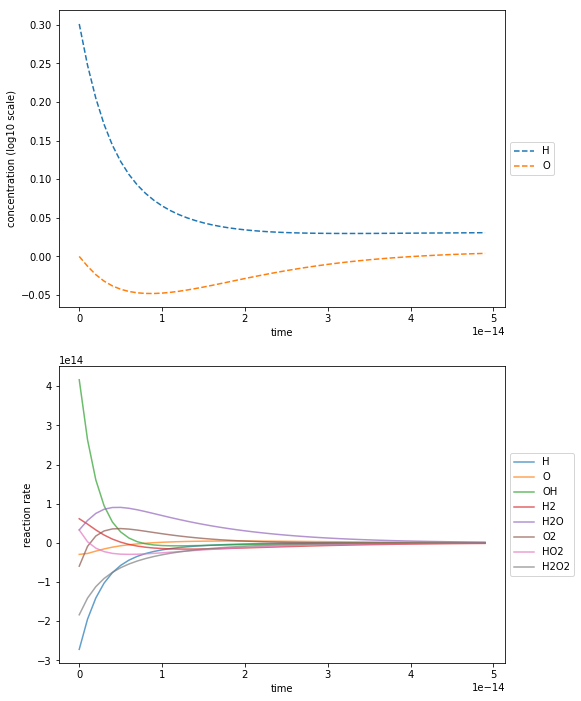

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from chemkin_CS207_G9.plotting.NonNetworkPlot import plot_concentration
from chemkin_CS207_G9.plotting.NonNetworkPlot import plot_reaction_rate

time_grid = np.arange(0, 5e-14, 1e-15)
fig, axes = plt.subplots(2, 1, figsize=(8,12))
plot_concentration(
    reac_sys, time_grid, ax=axes[0], linestyle='dashed', 
    species=['H','O'], logscale=True)
plot_reaction_rate(
    reac_sys, time_grid, ax=axes[1], alpha=0.7)
plt.show()
# fig.savefig('conc_rate_evo.png')

## Visualize Your Choice of Coefficient Law

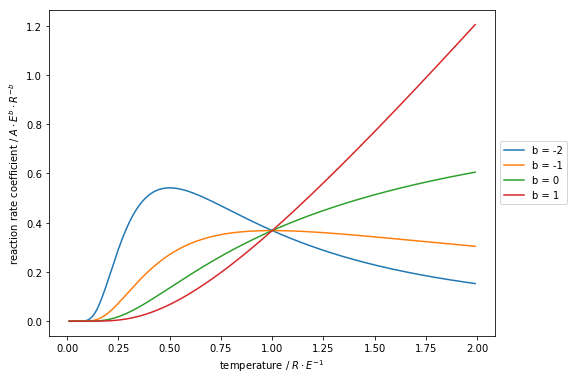

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from chemkin_CS207_G9.plotting.NonNetworkPlot import plot_modified_arrhenius

fig, ax = plt.subplots(figsize=(8,6))
plot_modified_arrhenius(
    RToE_grid=np.arange(0.01,2,0.01), 
    b_grid=np.arange(-2,2,1),
    ax=ax)
plt.show()
# fig.savefig('modarr.png')

## "Contribute" to the Library

In [19]:
from chemkin_CS207_G9.chemkin.reaction.Reaction import Reaction
Reaction._CoeffLawDict._get_all()

{'Arrhenius': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.Arrhenius,
 'Constant': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.Constant,
 'modArrhenius': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.modArrhenius,
 'modifiedArrhenius': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.modArrhenius}

In [20]:
from chemkin_CS207_G9.chemkin.auxiliary.mathematical_science import MathModel

class some_coeff_law(MathModel):
    @staticmethod
    def _kernel(T, E, R):
        return E / (T * R)
    def check_stateparams(self, T, **options):
        if T <= 0.0: raise ValueError

Reaction._CoeffLawDict.update('some', some_coeff_law)
Reaction._CoeffLawDict._get_all()

{'Arrhenius': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.Arrhenius,
 'Constant': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.Constant,
 'modArrhenius': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.modArrhenius,
 'modifiedArrhenius': chemkin_CS207_G9.chemkin.reaction.CoeffLaw.modArrhenius,
 'some': __main__.some_coeff_law}

In [21]:
reac = Reaction(coeffLaw='some', coeffParams=dict(E=4.157, R=8.314))
reac.rateCoeff(T=0.5)

1.0

In [22]:
Reaction._CoeffLawDict.update('arr', chemkin_CS207_G9.chemkin.reaction.CoeffLaw.Arrhenius)
reac = Reaction(coeffLaw='arr', coeffParams=dict(A=1.0, E=-4.157, R=8.314))
reac.rateCoeff(T=0.5)

2.718281828459045